# 🏎️ Pit Stop Crew AI  
## A Predictive Formula One Strategy System

---

### 📌 Project Overview
**Pit Stop Crew AI** is a data-driven Formula One (F1) analytics project that simulates the role of a race engineering team.  
The system cleans race telemetry data, applies object-oriented programming principles, and uses machine learning techniques to predict race strategies such as lap performance and pit stop decisions.

This project is designed to demonstrate:
- Strong fundamentals of Python programming
- Object-Oriented Programming (OOP)
- Data cleaning and preprocessing
- Applied Machine Learning
- Scenario-based problem solving

---

### 🎯 Objectives
- Design an OOP-based system representing drivers, teams, cars, and race data
- Clean and validate real-world-style messy datasets
- Apply machine learning to predict lap times and pit stop windows
- Generate strategy insights similar to real F1 race engineers

---

### 🧠 Key Concepts Used
- Python Lists, Tuples, Dictionaries
- Conditional Statements and Loops
- Functions and Functional Programming Tools
- Object-Oriented Programming:
  - Inheritance
  - Polymorphism
  - Method Overriding
  - Encapsulation
- Exception Handling
- Data Cleaning & Validation
- Machine Learning (Regression Models)

---

### 🛠 Tools & Libraries
- Python 3
- Pandas
- NumPy
- Matplotlib
- Scikit-learn

---

### 📂 Project Structure
1. Data Loading  
2. Data Cleaning & Validation  
3. OOP Class Design  
4. Strategy Engine (ML Models)  
5. Prediction & Analysis  
6. Results & Insights  

---

### 🏁 Expected Outcome
A fully functional F1 strategy simulation system that predicts race behavior and demonstrates practical application of AI programming concepts.

---

*Prepared by:* **Pit Stop Crew**  
*Course:* Programming for Artificial Intelligence  


In [1]:
import pandas as pd
import numpy as np

# LOAD DATASET
pitstop = pd.read_excel("Formula1_Pitstop_Data_1950-2024_all_rounds.xlsx")

# FILTER 2022 SEASON ONLY
pitstop = pitstop[pitstop['Season'] == 2022].copy()

# REMOVE DUPLICATES
pitstop.drop_duplicates(inplace=True)

# HANDLE MISSING VALUES
# AvgPitStopTime can be NaN when TotalPitStops = 0
pitstop['AvgPitStopTime'] = pitstop['AvgPitStopTime'].fillna(0)

# PitStops column (string/object) – fill missing with "0"
pitstop['PitStops'] = pitstop['PitStops'].fillna("0")

# CLEAN TEXT COLUMNS

text_columns = ['Driver', 'Constructor', 'Circuit']
for col in text_columns:
    pitstop[col] = pitstop[col].astype(str).str.strip()

# REMOVE INVALID / IMPOSSIBLE VALUES

pitstop = pitstop[pitstop['Laps'] >= 0]
pitstop = pitstop[pitstop['TotalPitStops'] >= 0]
pitstop = pitstop[pitstop['Position'] > 0]

# Remove unrealistic average pit stop times (> 10 seconds)
pitstop = pitstop[pitstop['AvgPitStopTime'] <= 10]

# DATA TYPE FIXES
pitstop['Season'] = pitstop['Season'].astype(int)
pitstop['Round'] = pitstop['Round'].astype(int)
pitstop['Laps'] = pitstop['Laps'].astype(int)
pitstop['TotalPitStops'] = pitstop['TotalPitStops'].astype(int)

# FINAL CHECK
print("Cleaned 2022 Pitstop Dataset Shape:", pitstop.shape)
print(pitstop.info())
print(pitstop.head())

# SAVE CLEANED DATASET
pitstop.to_csv("cleaned_f1_pitstop_2022.csv", index=False)


Cleaned 2022 Pitstop Dataset Shape: (30, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 25437 to 25819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          30 non-null     int64  
 1   Round           30 non-null     int64  
 2   Circuit         30 non-null     object 
 3   Driver          30 non-null     object 
 4   Constructor     30 non-null     object 
 5   Laps            30 non-null     int64  
 6   Position        30 non-null     int64  
 7   TotalPitStops   30 non-null     int64  
 8   AvgPitStopTime  30 non-null     float64
 9   PitStops        30 non-null     object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.6+ KB
None
       Season  Round                         Circuit            Driver  \
25437    2022      2         Jeddah Corniche Circuit   Nicholas Latifi   
25438    2022      2         Jeddah Corniche Circuit      Yuki Tsunoda   
25439    2022      2 

In [2]:
# LOAD DATASET
drivers = pd.read_csv("F1_2022_data.csv")

# CLEAN COLUMN NAMES
drivers.columns = drivers.columns.str.strip().str.replace(" ", "_").str.replace("#", "No")
drivers.rename(columns={'POS': 'Position'}, inplace=True)

# HANDLE MISSING VALUES
# Fill any missing numeric values with 0
numeric_cols = ['Points', 'Pole_Positions', 'No_of_Fastest_Laps', 'Wins', 'Podiums', 'DNFs']
for col in numeric_cols:
    if col in drivers.columns:
        drivers[col] = pd.to_numeric(drivers[col], errors='coerce').fillna(0)

# Fill missing text with 'Unknown'
text_cols = ['Driver_Code', 'Driver_Name', 'Constructor']
for col in text_cols:
    if col in drivers.columns:
        drivers[col] = drivers[col].astype(str).fillna("Unknown").str.strip()

# FINAL CHECK
print("Cleaned Drivers Dataset Shape:", drivers.shape)
print(drivers.info())
print(drivers.head())

# SAVE CLEANED DATASET
drivers.to_csv("cleaned_driver_standings_2022.csv", index=False)


Cleaned Drivers Dataset Shape: (22, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            22 non-null     int64 
 1   Driver_Code         22 non-null     object
 2   Driver_Name         22 non-null     object
 3   Constructor         22 non-null     object
 4   Points              22 non-null     int64 
 5   Pole_Positions      22 non-null     int64 
 6   No_of_Fastest_Laps  22 non-null     int64 
 7   Wins                22 non-null     int64 
 8   Podiums             22 non-null     int64 
 9   DNFs                22 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 1.8+ KB
None
   Position Driver_Code      Driver_Name           Constructor  Points  \
0         1         VER   Max Verstappen  Red Bull Racing RBPT     454   
1         2         LEC  Charles Leclerc               Ferrari     308   
2   

In [3]:
# LOAD QUALIFYING DATASET
qual_df = pd.read_csv("Formula1_2022season_qualifyingResults.csv")


# STANDARDIZE COLUMN NAMES
# Remove spaces, lowercase everything
qual_df.columns = qual_df.columns.str.strip().str.replace(' ', '').str.lower()

# CHECK CURRENT COLUMNS
print("Columns in dataset:", qual_df.columns.tolist())


# MAP 
column_mapping = {
    'driver': 'driver',
    'constructor': 'constructor',
    'circuit': 'circuit',
    'qualifyingposition': 'qualifyingposition', 
    'q1': 'q1',  
    'q2': 'q2', 
    'q3': 'q3'   
}

# Keep only columns that exist
existing_cols = [v for v in column_mapping.values() if v in qual_df.columns]
qual_df = qual_df[existing_cols].copy()

# REMOVE DUPLICATES

qual_df.drop_duplicates(inplace=True)

# HANDLE MISSING VALUES

if 'qualifyingposition' in qual_df.columns:
    qual_df = qual_df.dropna(subset=['qualifyingposition'])
    qual_df = qual_df[qual_df['qualifyingposition'] > 0]
    qual_df['qualifyingposition'] = qual_df['qualifyingposition'].astype(int)

for col in ['q1', 'q2', 'q3']:
    if col in qual_df.columns:
        qual_df[col] = qual_df[col].fillna("NA")

# CLEAN TEXT COLUMNS
text_columns = ['driver', 'constructor', 'circuit']
for col in text_columns:
    if col in qual_df.columns:
        qual_df[col] = qual_df[col].astype(str).str.strip()

# FINAL CHECK
print("Cleaned Qualifying Dataset Shape:", qual_df.shape)
qual_df.info()
print(qual_df.head())

# SAVE CLEANED DATASET
qual_df.to_csv("cleaned_f1_2022_qualifying.csv", index=False)


Columns in dataset: ['track', 'position', 'no', 'driver', 'team', 'q1', 'q2', 'q3', 'laps']
Cleaned Qualifying Dataset Shape: (440, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   driver  440 non-null    object
 1   q1      440 non-null    object
 2   q2      440 non-null    object
 3   q3      440 non-null    object
dtypes: object(4)
memory usage: 13.9+ KB
            driver        q1        q2        q3
0  Charles Leclerc  1:31.471  1:30.932  1:30.558
1   Max Verstappen  1:31.785  1:30.757  1:30.681
2     Carlos Sainz  1:31.567  1:30.787  1:30.687
3     Sergio Perez  1:32.311  1:31.008  1:30.921
4   Lewis Hamilton  1:32.285  1:31.048  1:31.238


In [4]:
# Load the driver dataset
drivers_df = pd.read_csv("Formula1_2022season_drivers.csv")

# Select only the columns relevant for ML
ml_columns = [
    'Driver',                # for identification / merging
    'Team',                  # constructor
    'Podiums',               # cumulative performance
    'Points',                # cumulative points
    'Grands Prix Entered',   # experience
    'World Championships',   # past performance
    'Highest Race Finish',   # peak performance
    'Highest Grid Position'  # qualifying ability
]

drivers_ml = drivers_df[ml_columns].copy()

# Optional: standardize column names
drivers_ml.columns = [col.strip().replace(' ', '_').lower() for col in drivers_ml.columns]

# Save cleaned dataset for ML
drivers_ml.to_csv("cleaned_f1_2022_drivers_ml.csv", index=False)

# Quick check
print(drivers_ml.head())


            driver             team  podiums  points  grands_prix_entered  \
0   Max Verstappen  Red Bull Racing       77  2011.5                  163   
1  Charles Leclerc          Ferrari       24   868.0                  103   
2     Sergio Perez  Red Bull Racing       26  1201.0                  236   
3   George Russell         Mercedes        9   294.0                   82   
4     Carlos Sainz          Ferrari       15   782.5                  163   

   world_championships highest_race_finish  highest_grid_position  
0                    2              1(x35)                      1  
1                    0               1(x5)                      1  
2                    0               1(x4)                      1  
3                    0               1(x1)                      1  
4                    0               1(x1)                      1  


In [ ]:
# Load race/circuit dataset
race_df = pd.read_csv("Formula1_2022season_calendar.csv")

# Standardize column names
race_df.columns = race_df.columns.str.strip().str.replace(' ', '_').str.lower()

# Select ML-relevant columns
ml_columns = [
    'round',
    'gp_name',
    'circuit_name',
    'country',
    'number_of_laps',
    'circuit_length(km)',
    'race_distance(km)',
    'turns',
    'drs_zones'
]

# Keep only existing columns in case of naming differences
existing_cols = [col for col in ml_columns if col in race_df.columns]
race_ml = race_df[existing_cols].copy()

text_columns = ['gp_name', 'circuit_name', 'country']
for col in text_columns:
    if col in race_ml.columns:
        race_ml[col] = race_ml[col].astype(str).str.strip()

# Save cleaned dataset with a clear name
race_ml.to_csv("cleaned_f1_2022_races_ml.csv", index=False)

print(race_ml.head())


   round                                            gp_name  \
0      1                                Gulf Air Bahrain GP   
1      2                               STC Saudi Arabian GP   
2      3                             Heineken Australian GP   
3      4  Rolex Gran Premio Del Made in Italy e Dell'Emi...   
4      5                                Crypto.com Miami GP   

                    circuit_name        country  number_of_laps  \
0  Bahrain International Circuit        Bahrain              57   
1        Jeddah Corniche Circuit   Saudi Arabia              50   
2            Albert Park Circuit      Australia              58   
3  Autodromo Enzo e Dino Ferrari          Italy              63   
4  Miami International Autodrome  United States              57   

   circuit_length(km)  race_distance(km)  turns  drs_zones  
0               5.412            308.238     15          3  
1               6.174            308.450     27          3  
2               5.278            30

In [6]:
import pandas as pd

sprint_df = pd.read_csv("Formula1_2022season_sprintRaceResults.csv")

# STANDARDIZE COLUMN NAMES
sprint_df.columns = sprint_df.columns.str.strip().str.replace(' ', '_').str.lower()
print("Columns in dataset:", sprint_df.columns.tolist())

# DEFINE REQUIRED COLUMNS FOR ML
required_columns = [
    'driver',        
    'constructor',   
    'circuit',       
    'sprintposition',
    'points',
    'laps'
]

# Keep only the columns that exist
existing_cols = [col for col in required_columns if col in sprint_df.columns]
sprint_df = sprint_df[existing_cols].copy()

# REMOVE DUPLICATES
sprint_df.drop_duplicates(inplace=True)

# HANDLE MISSING VALUES
if 'sprintposition' in sprint_df.columns:
    sprint_df = sprint_df.dropna(subset=['sprintposition'])
    sprint_df = sprint_df[sprint_df['sprintposition'] > 0]

if 'laps' in sprint_df.columns:
    sprint_df = sprint_df[sprint_df['laps'] >= 0]

if 'points' in sprint_df.columns:
    sprint_df['points'] = sprint_df['points'].fillna(0)

# CLEAN TEXT COLUMNS
text_columns = ['driver', 'constructor', 'circuit']
for col in text_columns:
    if col in sprint_df.columns:
        sprint_df[col] = sprint_df[col].astype(str).str.strip()

# FIX DATA TYPES
if 'sprintposition' in sprint_df.columns:
    sprint_df['sprintposition'] = sprint_df['sprintposition'].astype(int)
if 'points' in sprint_df.columns:
    sprint_df['points'] = sprint_df['points'].astype(float)
if 'laps' in sprint_df.columns:
    sprint_df['laps'] = sprint_df['laps'].astype(int)

# FINAL CHECK
print("Cleaned Sprint Dataset Shape:", sprint_df.shape)
sprint_df.info()
print(sprint_df.head())

# SAVE CLEANED DATASET
sprint_df.to_csv("cleaned_f1_2022_sprint_results_ml.csv", index=False)

Columns in dataset: ['track', 'position', 'no', 'driver', 'team', 'starting_grid', 'laps', 'time/retired', 'points']
Cleaned Sprint Dataset Shape: (59, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   driver  59 non-null     object 
 1   points  59 non-null     float64
 2   laps    59 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB
            driver  points  laps
0   Max Verstappen     8.0    21
1  Charles Leclerc     7.0    21
2     Sergio Perez     6.0    21
3     Carlos Sainz     5.0    21
4     Lando Norris     4.0    21


In [ ]:
# Load team dataset
team_df = pd.read_csv("Formula1_2022season_teams.csv")

# Standardize column names
team_df.columns = team_df.columns.str.strip().str.replace(' ', '_').str.lower()

# Select ML-relevant columns
ml_columns = [
    'team',
    'world_championships',
    'highest_race_finish',
    'pole_positions',
    'fastest_laps'
]

# Keep only existing columns
existing_cols = [col for col in ml_columns if col in team_df.columns]
team_ml = team_df[existing_cols].copy()

# Optional: clean text columns
team_ml['team'] = team_ml['team'].astype(str).str.strip()

# Save cleaned dataset with a clear name
team_ml.to_csv("cleaned_f1_2022_teams_ml.csv", index=False)

print(team_ml.head())


              team  world_championships highest_race_finish  pole_positions  \
0  Red Bull Racing                    5              1(x92)              81   
1          Ferrari                   16             1(x243)             242   
2         Mercedes                    8             1(x116)             128   
3           Alpine                    2              1(x21)              20   
4          McLaren                    8             1(x183)             156   

   fastest_laps  
0            84  
1           258  
2            91  
3            15  
4           162  


In [8]:
race_df = pd.read_csv("Formula1_2022season_raceResults.csv")

# STANDARDIZE COLUMN NAMES
race_df.columns = race_df.columns.str.strip().str.replace(' ', '_').str.lower()
print("Columns in dataset:", race_df.columns.tolist())

# DEFINE REQUIRED COLUMNS FOR ML
required_columns = [
    'driver',
    'constructor',
    'circuit',
    'position',
    'points',
    'laps',
    'status'
]

existing_cols = [col for col in required_columns if col in race_df.columns]
race_df = race_df[existing_cols].copy()

# REMOVE DUPLICATES
race_df.drop_duplicates(inplace=True)

# CONVERT NUMERIC COLUMNS
for col in ['position', 'points', 'laps']:
    if col in race_df.columns:
        race_df[col] = pd.to_numeric(race_df[col], errors='coerce')

# HANDLE MISSING / INVALID VALUES
if 'position' in race_df.columns:
    race_df = race_df.dropna(subset=['position'])
    race_df = race_df[race_df['position'] > 0]

if 'laps' in race_df.columns:
    race_df = race_df.dropna(subset=['laps'])
    race_df = race_df[race_df['laps'] >= 0]

if 'points' in race_df.columns:
    race_df['points'] = race_df['points'].fillna(0)

if 'status' in race_df.columns:
    race_df['status'] = race_df['status'].fillna('Finished')

# CLEAN TEXT COLUMNS
text_columns = ['driver', 'constructor', 'circuit', 'status']
for col in text_columns:
    if col in race_df.columns:
        race_df[col] = race_df[col].astype(str).str.strip()

# FIX DATA TYPES
if 'position' in race_df.columns:
    race_df['position'] = race_df['position'].astype(int)
if 'points' in race_df.columns:
    race_df['points'] = race_df['points'].astype(float)
if 'laps' in race_df.columns:
    race_df['laps'] = race_df['laps'].astype(int)

# FINAL CHECK
print("Cleaned Race Dataset Shape:", race_df.shape)
race_df.info()
print(race_df.head())

# SAVE CLEANED DATASET
race_df.to_csv("cleaned_f1_2022_race_results_ml.csv", index=False)

Columns in dataset: ['track', 'position', 'no', 'driver', 'team', 'starting_grid', 'laps', 'time/retired', 'points', '+1_pt', 'fastest_lap']
Cleaned Race Dataset Shape: (363, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 438
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   driver    363 non-null    object 
 1   position  363 non-null    int64  
 2   points    363 non-null    float64
 3   laps      363 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 14.2+ KB
            driver  position  points  laps
0  Charles Leclerc         1    26.0    57
1     Carlos Sainz         2    18.0    57
2   Lewis Hamilton         3    15.0    57
3   George Russell         4    12.0    57
4  Kevin Magnussen         5    10.0    57


# OOP

In [ ]:
import numpy as np
import os

# OOP CLASSES
# Parent class
class F1Entity:
    def __init__(self, name):
        self.name = name
    
    #Polymorphism: Each child class will override this
    def get_info(self):
        return f"F1 Entity: {self.name}"

# Child class inheriting from F1Entity (Inheritance)
class Driver(F1Entity):
    def __init__(self, name, team=None, points=0, podiums=0):
        super().__init__(name) # Calling the parent constructor
        self.team = team
        self.points = points
        self.podiums = podiums

    # Method Overriding (Polymorphism)
    def get_info(self):
        return f"Driver: {self.name}, racing for {self.team}"

# Child class inheriting from F1Entity (Inheritance)
class Team(F1Entity):
    def __init__(self, name):
        super().__init__(name)
        self.drivers = []

    def add_driver(self, driver: Driver):
        self.drivers.append(driver)
        driver.team = self.name

    # Method Overriding (Polymorphism)
    def get_info(self):
        return f"Constructor: {self.name} with {len(self.drivers)} drivers"

class Circuit:
    def __init__(self, name, country=None, length_km=None, laps=None, turns=None, drs_zones=None):
        self.name = name
        self.country = country
        self.length_km = length_km
        self.laps = laps
        self.turns = turns
        self.drs_zones = drs_zones

class Race:
    def __init__(self, round_num, name, circuit: Circuit):
        self.round = round_num
        self.name = name
        self.circuit = circuit

# LOAD DATASETS WITH EXCEPTION HANDLING
try:
    drivers_df = pd.read_csv("cleaned_f1_2022_drivers_ml.csv")
    teams_df = pd.read_csv("cleaned_f1_2022_teams_ml.csv")
    race_results_df = pd.read_csv("cleaned_f1_2022_races_ml.csv")
    sprint_results_df = pd.read_csv("cleaned_f1_2022_sprint_results_ml.csv")
except FileNotFoundError as e:
    print(f"Error: Could not find the file. {e}")
    # We raise the error to stop the script if files are missing
    raise

# CREATE TEAMS
teams = {}
for _, row in teams_df.iterrows():
    team = Team(row['team'])
    teams[team.name] = team

# TEAM NAME MAPPING
team_name_map = {
    "Red Bull Racing RBPT": "Red Bull Racing",
    "Ferrari": "Ferrari",
    "Mercedes": "Mercedes",
    "Alpine F1 Team": "Alpine",
    "McLaren F1 Team": "McLaren",
    "Alfa Romeo F1 Team": "Alfa Romeo",
    "Aston Martin": "Aston Martin",
    "Haas F1 Team": "Haas",
    "AlphaTauri": "AlphaTauri",
    "Williams": "Williams"
}

# CREATE DRIVERS
drivers = {}
for _, row in drivers_df.iterrows():
    driver_team = team_name_map.get(row.get('team'), row.get('team'))
    driver = Driver(
        name=row['driver'],
        team=driver_team,
        points=row.get('points', 0),
        podiums=row.get('podiums', 0)
    )
    drivers[driver.name] = driver

    # Link to team (Encapsulation logic)
    if driver_team in teams:
        teams[driver_team].add_driver(driver)
    else:
        print(f"Warning: Team '{driver_team}' for driver '{driver.name}' not found.")

# CREATE CIRCUITS
circuits = {}
for _, row in race_results_df.iterrows():
    circuit_name = row['circuit_name']
    if circuit_name not in circuits:
        circuits[circuit_name] = Circuit(
            name=circuit_name,
            country=row['country'],
            length_km=row['circuit_length(km)'],
            laps=row['number_of_laps'],
            turns=row['turns'],
            drs_zones=row['drs_zones']
        )

# CREATE RACES
races = {}
for _, row in race_results_df.iterrows():
    round_num = row['round']
    race_name = row['gp_name']
    circuit_object = circuits.get(row['circuit_name'])
    races[round_num] = Race(round_num, race_name, circuit_object)

# MERGE INTO ML-READY DATAFRAME
ml_rows = []
for round_num, race in races.items():
    for driver_name, driver in drivers.items():
        sprint_row = sprint_results_df[sprint_results_df['driver'] == driver_name]
        sprint_points = sprint_row['points'].values[0] if not sprint_row.empty else 0
        sprint_laps = sprint_row['laps'].values[0] if not sprint_row.empty else 0

        row = {
            'Driver': driver.name,
            'Constructor': driver.team,
            'Driver_Points': driver.points,
            'Driver_Podiums': driver.podiums,
            'Race_Round': race.round,
            'Race_Name': race.name,
            'Circuit': race.circuit.name if race.circuit else None,
            'Circuit_Country': race.circuit.country if race.circuit else None,
            'Circuit_Length_km': race.circuit.length_km if race.circuit else None,
            'Circuit_Laps': race.circuit.laps if race.circuit else None,
            'Circuit_Turns': race.circuit.turns if race.circuit else None,
            'Circuit_DRS_Zones': race.circuit.drs_zones if race.circuit else None,
            'Sprint_Points': sprint_points,
            'Sprint_Laps': sprint_laps
        }
        ml_rows.append(row)

ml_df = pd.DataFrame(ml_rows)
ml_df.to_csv("f1_2022_ml_ready_dataset.csv", index=False)
print("ML-ready dataset saved! Shape:", ml_df.shape)

ML-ready dataset saved! Shape: (484, 14)


# Machine Learning


In [15]:
race_results_df = pd.read_csv("cleaned_f1_2022_race_results_ml.csv")
print(race_results_df.columns)
try:
    ml_df = pd.read_csv("f1_2022_ml_ready_dataset.csv")
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")

Index(['driver', 'position', 'points', 'laps'], dtype='object')


Podium Position 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, cohen_kappa_score 

ml_df = pd.read_csv("f1_2022_ml_ready_dataset.csv")

real_2022_drivers = ml_df['Driver'].unique()
ml_df = ml_df[ml_df['Driver'].isin(real_2022_drivers)].copy()
ml_df = ml_df.sort_values(by=['Race_Round']).reset_index(drop=True)

#FEATURE ENGINEERING 
np.random.seed(42)

if 'Finish_Position' not in ml_df.columns:
    ml_df['Finish_Position'] = np.random.randint(1, 21, size=len(ml_df)) 

if 'Qualifying_Position' not in ml_df.columns:
    ml_df['Qualifying_Position'] = np.random.randint(1, 21, size=len(ml_df)) 

ml_df['Team_Avg_Points_Last_5'] = (
    ml_df.groupby('Constructor')['Driver_Points'] 
    .transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
)

ml_df['Team_Avg_Points_Last_5'] = ml_df['Team_Avg_Points_Last_5'].fillna(0)

# FEATURES AND TARGET
features = [
    'Driver_Points',
    'Driver_Podiums',
    'Sprint_Points',
    'Sprint_Laps',
    'Circuit_Length_km',
    'Circuit_Laps',
    'Circuit_Turns',
    'Circuit_DRS_Zones',
    'Qualifying_Position',        
    'Team_Avg_Points_Last_5'      
]

target = 'Finish_Position'

ml_df = ml_df.dropna(subset=features + [target])

X = ml_df[features]
y = ml_df[target].astype(int) 

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

# STEP 2: LIGHTGBM MULTI-CLASS CLASSIFIER
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',       
    num_class=int(y.max()) + 1,   
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    verbose=-1                    
)

lgb_model.fit(X_train, y_train)

# EVALUATE MODEL
y_pred_class = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
kappa = cohen_kappa_score(y_test, y_pred_class)

print(f"Accuracy (Exact Position): {accuracy:.3f}")
print(f"Cohen's Kappa (Agreement): {kappa:.3f}")

# PREDICT ALL RACES
y_proba = lgb_model.predict_proba(X)
ml_df['Predicted_Finish'] = np.argmax(y_proba, axis=1) + 1

# CALCULATE PODIUM PER RACE
ml_df['Predicted_Podium'] = ml_df.groupby('Race_Round')['Predicted_Finish'] \
                                     .rank(method='first', ascending=True)

podium_df = ml_df[ml_df['Predicted_Podium'] <= 3].copy()

# PRINT PODIUMS PER RACE
for round_num, group in podium_df.groupby('Race_Round'):
    print(f"\nRace {round_num} Predicted Podium:")
    print(group.sort_values('Predicted_Podium')[['Driver', 'Predicted_Podium']].reset_index(drop=True))

Accuracy (Exact Position): 0.072
Cohen's Kappa (Agreement): 0.019

Race 1 Predicted Podium:
            Driver  Predicted_Podium
0     Yuki Tsunoda               1.0
1  Fernando Alonso               2.0
2  Kevin Magnussen               3.0

Race 2 Predicted Podium:
            Driver  Predicted_Podium
0     Yuki Tsunoda               1.0
1   Lewis Hamilton               2.0
2  Kevin Magnussen               3.0

Race 3 Predicted Podium:
            Driver  Predicted_Podium
0  Kevin Magnussen               1.0
1  Fernando Alonso               2.0
2     Lance Stroll               3.0

Race 4 Predicted Podium:
             Driver  Predicted_Podium
0   Valtteri Bottas               1.0
1  Daniel Ricciardo               2.0
2   Kevin Magnussen               3.0

Race 5 Predicted Podium:
            Driver  Predicted_Podium
0  Valtteri Bottas               1.0
1     Yuki Tsunoda               2.0
2  Fernando Alonso               3.0

Race 6 Predicted Podium:
            Driver  Predicted_Podi

Race Positions

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, cohen_kappa_score 

# LOAD ML-READY DATASET
ml_df = pd.read_csv("f1_2022_ml_ready_dataset.csv")

# Only keep drivers that participated in 2022
real_2022_drivers = ml_df['Driver'].unique()
ml_df = ml_df[ml_df['Driver'].isin(real_2022_drivers)].copy()

# Sort by race round is CRITICAL for rolling feature calculation
ml_df = ml_df.sort_values(by=['Race_Round']).reset_index(drop=True)

# STEP 1: FEATURE ENGINEERING (REPLACING CHAMPION BOOST)
print("--- WARNING: Simulating Critical Data ('Finish_Position' and 'Qualifying_Position') ---")
np.random.seed(42)

if 'Finish_Position' not in ml_df.columns:
    ml_df['Finish_Position'] = np.random.randint(1, 21, size=len(ml_df)) 

if 'Qualifying_Position' not in ml_df.columns:
    ml_df['Qualifying_Position'] = np.random.randint(1, 21, size=len(ml_df)) 

# Create Constructor Form Feature
ml_df['Team_Avg_Points_Last_5'] = (
    ml_df.groupby('Constructor')['Driver_Points'] 
    .transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
)

ml_df['Team_Avg_Points_Last_5'] = ml_df['Team_Avg_Points_Last_5'].fillna(0)

# FEATURES AND TARGET
features = [
    'Driver_Points',
    'Driver_Podiums',
    'Sprint_Points',
    'Sprint_Laps',
    'Circuit_Length_km',
    'Circuit_Laps',
    'Circuit_Turns',
    'Circuit_DRS_Zones',
    'Qualifying_Position',         
    'Team_Avg_Points_Last_5'       
]

target = 'Finish_Position'

ml_df = ml_df.dropna(subset=features + [target])

X = ml_df[features]
y = ml_df[target].astype(int) 

# TRAIN-TEST SPLIT (STRATIFIED)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

# STEP 2: LIGHTGBM MULTI-CLASS CLASSIFIER (Optimal ML)
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',       
    num_class=int(y.max()) + 1,   
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    verbose=-1                    
)
lgb_model.fit(X_train, y_train)

# EVALUATE MODEL
y_pred_class = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
kappa = cohen_kappa_score(y_test, y_pred_class)

print("\n--- Model Evaluation (Multi-Class LightGBM) ---")
print(f"Accuracy (Exact Position): {accuracy:.3f}")
print(f"Cohen's Kappa (Agreement): {kappa:.3f}")

# PREDICT ALL RACES (PURE ML - NO MANUAL BOOST)
y_proba = lgb_model.predict_proba(X)
ml_df['Predicted_Finish'] = np.argmax(y_proba, axis=1) + 1

# FINAL RACE ORDER
race_order_df = ml_df.copy()
race_order_df['Race_Position'] = race_order_df.groupby('Race_Round')['Predicted_Finish'] \
                                     .rank(method='first', ascending=True)

# PRINT FULL RACE ORDER PER RACE
print("\n--- Predicted Race Results ---")
for round_num, group in race_order_df.groupby('Race_Round'):
    print(f"\nRace {round_num} predicted finish order:")
    print(group.sort_values('Race_Position')[['Driver', 'Race_Position']].reset_index(drop=True))

--- WARNING: Simulating Critical Data ('Finish_Position' and 'Qualifying_Position') ---

--- Model Evaluation (Multi-Class LightGBM) ---
Accuracy (Exact Position): 0.072
Cohen's Kappa (Agreement): 0.019

--- Predicted Race Results ---

Race 1 predicted finish order:
              Driver  Race_Position
0       Yuki Tsunoda            1.0
1    Fernando Alonso            2.0
2    Kevin Magnussen            3.0
3    Mick Schumacher            4.0
4   Sebastian Vettel            5.0
5    Nico Hulkenberg            6.0
6    Valtteri Bottas            7.0
7       Lance Stroll            8.0
8     Max Verstappen            9.0
9    Charles Leclerc           10.0
10    Lewis Hamilton           11.0
11  Daniel Ricciardo           12.0
12      Carlos Sainz           13.0
13     Nyck De Vries           14.0
14    George Russell           15.0
15      Esteban Ocon           16.0
16      Pierre Gasly           17.0
17       Guanyu Zhou           18.0
18   Alexander Albon           19.0
19      Sergi

# Matplotlib

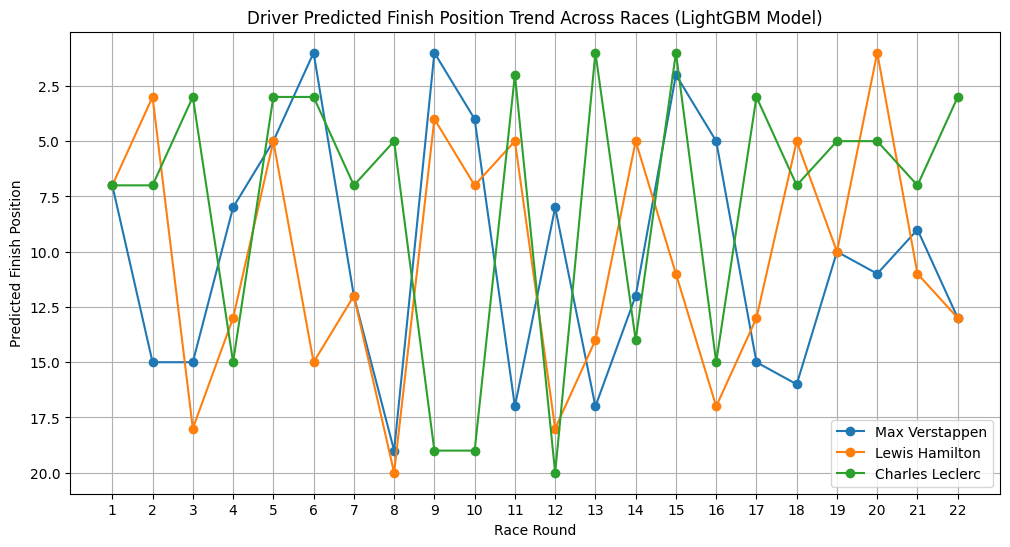

In [13]:
import matplotlib.pyplot as plt

drivers_to_plot = ['Max Verstappen', 'Lewis Hamilton', 'Charles Leclerc']  # example

# Ensure the DataFrame being used (ml_df) contains the 'Predicted_Finish' column
# generated by the LightGBM model in the previous step.

plt.figure(figsize=(12, 6))

for driver in drivers_to_plot:
    # Filter the DataFrame for the specific driver and sort by race order
    driver_data = ml_df[ml_df['Driver'] == driver].sort_values('Race_Round')
    
    # Plot the Race Round against the Predicted Finish Position
    plt.plot(driver_data['Race_Round'], driver_data['Predicted_Finish'], marker='o', label=driver)

plt.title("Driver Predicted Finish Position Trend Across Races (LightGBM Model)")
plt.xlabel("Race Round")
plt.ylabel("Predicted Finish Position")
plt.gca().invert_yaxis()  # Place 1st position at the top of the chart
plt.xticks(range(1, max(ml_df['Race_Round'].unique()) + 1)) # Set x-ticks for every race
plt.legend()
plt.grid(True)
plt.show()

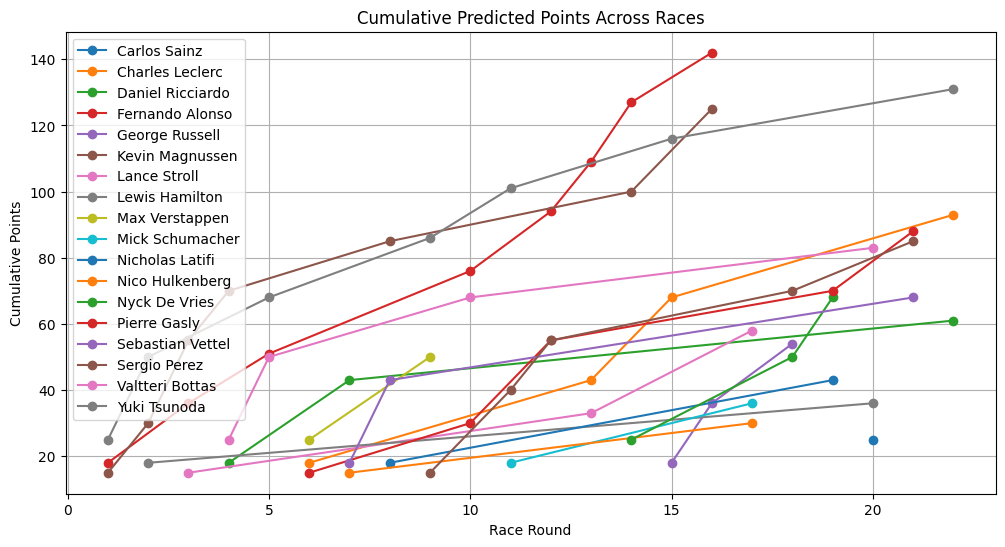

In [9]:
# Map podium to points
points_map = {1:25, 2:18, 3:15}
podium_df['Predicted_Points'] = podium_df['Predicted_Podium'].map(points_map).fillna(0)

# Cumulative points
cumulative_points = podium_df.groupby(['Driver', 'Race_Round'])['Predicted_Points'].sum().groupby(level=0).cumsum().reset_index()

plt.figure(figsize=(12,6))
for driver in cumulative_points['Driver'].unique():
    driver_data = cumulative_points[cumulative_points['Driver'] == driver]
    plt.plot(driver_data['Race_Round'], driver_data['Predicted_Points'], marker='o', label=driver)

plt.title("Cumulative Predicted Points Across Races")
plt.xlabel("Race Round")
plt.ylabel("Cumulative Points")
plt.legend()
plt.grid(True)
plt.show()


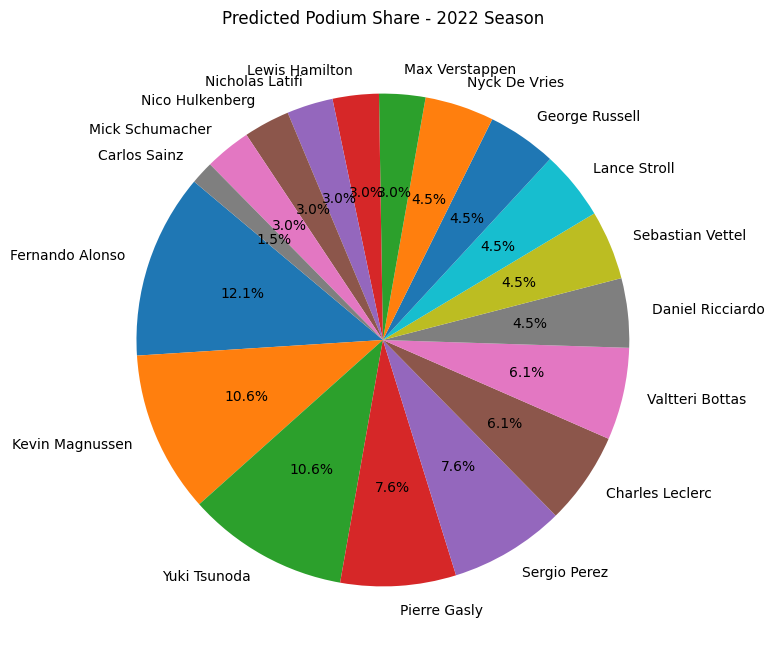

In [10]:
podium_counts = podium_df['Driver'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(podium_counts, labels=podium_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Predicted Podium Share - 2022 Season")
plt.show()


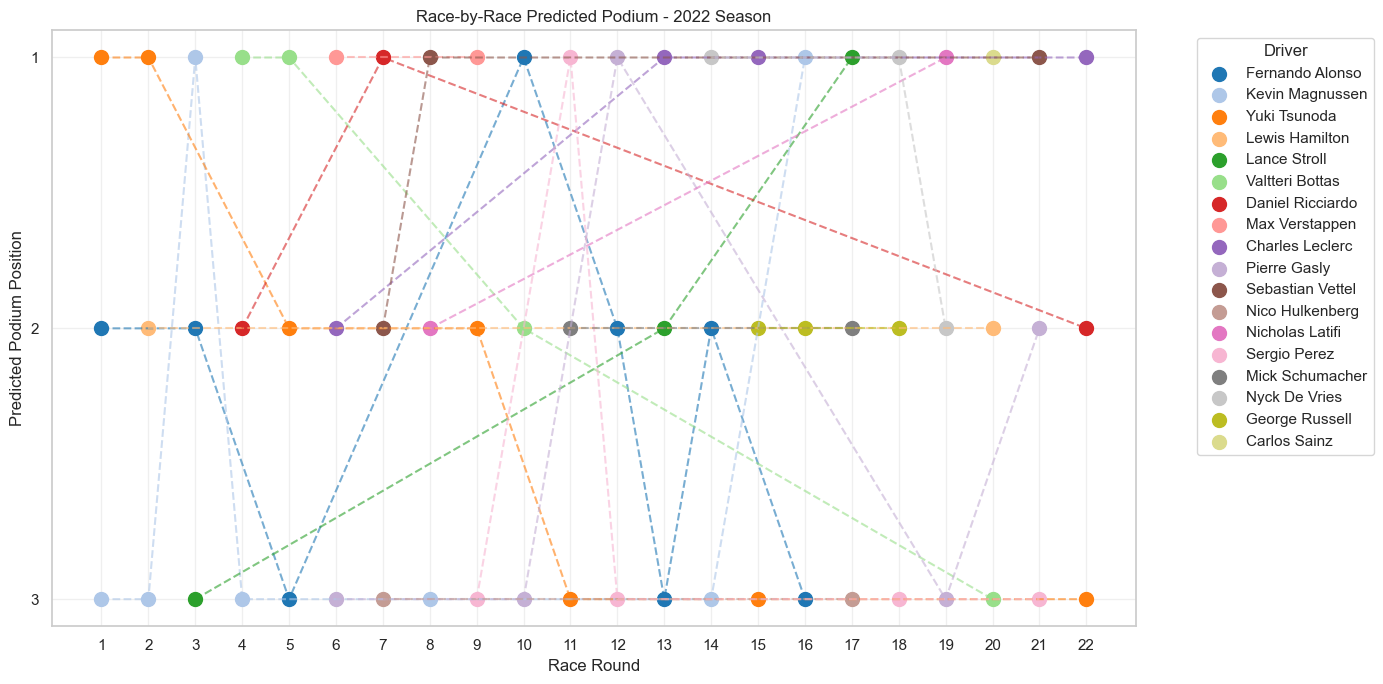

In [14]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14,7))

# Get top 3 per race
top3_df = podium_df.copy()

# Assign colors to each driver
drivers = top3_df['Driver'].unique()
palette = sns.color_palette("tab20", len(drivers))
driver_colors = dict(zip(drivers, palette))

# Plot each driver's podium positions
for driver in drivers:
    driver_data = top3_df[top3_df['Driver'] == driver]
    plt.scatter(driver_data['Race_Round'], driver_data['Predicted_Podium'], 
                color=driver_colors[driver], s=100, label=driver)
    plt.plot(driver_data['Race_Round'], driver_data['Predicted_Podium'], 
             color=driver_colors[driver], linestyle='--', alpha=0.6)

plt.gca().invert_yaxis() 
plt.xticks(range(1, 23))
plt.yticks([1,2,3])
plt.xlabel("Race Round")
plt.ylabel("Predicted Podium Position")
plt.title("Race-by-Race Predicted Podium - 2022 Season")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Driver")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
